<a href="https://colab.research.google.com/github/elijahcw-git/Capstone/blob/main/data_cleaner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
crime_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/crime.csv')
weather_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/weather.csv')

In [ ]:
crime_df['DATE_OCC'] = pd.to_datetime(crime_df['DATE_OCC'])
weather_df['DATE_OCC'] = pd.to_datetime(weather_df['DATE_OCC'])
merged_df = pd.merge(crime_df, weather_df, on='DATE_OCC', how='inner')

In [ ]:
pd.set_option('display.max_rows', 15)

print(str(merged_df['Crm_Cd_Desc'].nunique()) + ' Total Crime Categories\n')
print(merged_df['Crm_Cd_Desc'].value_counts())

144 Total Crime Categories

BATTERY - SIMPLE ASSAULT                                   255465
VEHICLE - STOLEN                                           235567
BURGLARY FROM VEHICLE                                      212809
BURGLARY                                                   197216
THEFT PLAIN - PETTY ($950 & UNDER)                         189679
                                                            ...  
BOAT - ATTEMPTED STOLEN                                         2
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        2
TRAIN WRECKING                                                  2
FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)         1
DRUNK ROLL - ATTEMPT                                            1
Name: Crm_Cd_Desc, Length: 144, dtype: int64


In [ ]:
def categorize_crime(crime):
    """Map specific crimes to broader categories."""
    # Assault and Battery
    if crime in ['INTIMATE PARTNER - SIMPLE ASSAULT', 'BRANDISH WEAPON', 'BATTERY - SIMPLE ASSAULT',
                 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',
                 'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT', 'WEAPONS POSSESSION/BOMBING', 'BATTERY POLICE (SIMPLE)',
                 'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'THEFT, COIN MACHINE - GRAND ($950.01 & OVER)',
                 'LYNCHING', 'SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT', 'BOAT - ATTEMPTED STOLEN', 'THROWING OBJECT AT MOVING VEHICLE', 'LYNCHING - ATTEMPTED', 'BOMB SCARE', 'CRIMINAL HOMICIDE',
                 'CRIMINAL THREATS - NO WEAPON DISPLAYED',  'BOAT - STOLEN', 'PICKPOCKET, ATTEMPT', 'MANSLAUGHTER, NEGLIGENT',
                 'OTHER ASSAULT', 'BATTERY ON A FIREFIGHTER', 'BATTERY WITH SEXUAL CONTACT']:
        return 'Assault, Battery and Other Violent'
    # Theft and Burglary
    elif crime in ['THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD', 'THEFT PLAIN - PETTY ($950 & UNDER)',
                   'BURGLARY FROM VEHICLE', 'DOCUMENT WORTHLESS ($200 & UNDER)' 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
                   'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)', 'DRUNK ROLL', 'BUNCO, PETTY THEFT', 'BUNCO, GRAND THEFT', 'BURGLARY', 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)',
                   'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT, COIN MACHINE - ATTEMPT', 'DRUNK ROLL - ATTEMPT', 'VEHICLE - ATTEMPT STOLEN', 'VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE, ATTEMPTED',
                    'BIKE - ATTEMPTED STOLEN','GRAND THEFT / AUTO REPAIR', 'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)', 'PETTY THEFT - AUTO REPAIR', 'TILL TAP - PETTY ($950 & UNDER)', 'THEFT FROM PERSON - ATTEMPT', 'SHOPLIFTING - ATTEMPT',
                   'THEFT, COIN MACHINE - PETTY ($950 & UNDER)', 'TILL TAP - ATTEMPT', 'BURGLARY, ATTEMPTED', 'BUNCO, ATTEMPT', 'THEFT PLAIN - ATTEMPT', 'BIKE - STOLEN',
                   'THEFT FROM MOTOR VEHICLE - ATTEMPT', 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
                   'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)', 'THEFT, PERSON', 'PURSE SNATCHING', 'GRAND THEFT / AUTO REPAIR'
                   'PICKPOCKET', 'PURSE SNATCHING - ATTEMPT', 'TILL TAP - GRAND THEFT ($950.01 & OVER)',]:
        return 'Theft and Burglary'
    # Vandalism and Property Damage
    elif crime in ['VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)', 'TELEPHONE PROPERTY - DAMAGE',
                   'VANDALISM - MISDEAMEANOR ($399 OR UNDER)', 'ARSON']:
        return 'Vandalism and Property Damage'
    # Sexual Offenses
    elif crime in ['RAPE, ATTEMPTED', 'SEXUAL PENETRATION W/FOREIGN OBJECT', 'PANDERING', 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
                   'RAPE, FORCIBLE', 'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ', 'BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM',
                   'LEWD CONDUCT', 'ORAL COPULATION', 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
                   'LEWD/LASCIVIOUS ACTS WITH CHILD', 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',  'PEEPING TOM','CHILD PORNOGRAPHY',
                   'INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)', 'INDECENT EXPOSURE']:
        return 'Sexual Offenses'
    # Robbery and Extortion
    elif crime in ['ROBBERY', 'ATTEMPTED ROBBERY', 'EXTORTION']:
        return 'Robbery and Extortion'
    # Violations and Restraining Orders
    elif crime in ['VIOLATION OF COURT ORDER', 'VIOLATION OF RESTRAINING ORDER', 'UNAUTHORIZED COMPUTER ACCESS', 'ILLEGAL DUMPING',
                   'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE', 'VIOLATION OF TEMPORARY RESTRAINING ORDER', 'FIREARMS TEMPORARY RESTRAINING ORDER (TEMP FIREARMS RO)',
                   'FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)','TRESPASSING']:
        return 'Violations and Restraining Orders'
    # Fraud and Financial Crimes
    elif crime in ['THEFT OF IDENTITY', 'DOCUMENT FORGERY / STOLEN FELONY', 'BIGAMY', 'COUNTERFEIT',
                   'DEFRAUDING INNKEEPER/THEFT OF SERVICES, $950 & UNDER', 'DEFRAUDING INNKEEPER/THEFT OF SERVICES, OVER $950.01',
                   'FALSE POLICE REPORT', 'DRIVING WITHOUT OWNER CONSENT (DWOC)', 'BRIBERY', 'CONSPIRACY','GRAND THEFT / INSURANCE FRAUD',
                   'CREDIT CARDS, FRAUD USE ($950 & UNDER)', 'CREDIT CARDS, FRAUD USE ($950.01 & OVER)',
                   'DISHONEST EMPLOYEE - GRAND THEFT', 'DISHONEST EMPLOYEE - PETTY THEFT']:
        return 'Fraud and Financial Crimes'
    # Miscellaneous Crimes
    else:
        return 'Miscellaneous Crimes'

# Apply the categorization function to your DataFrame
merged_df['Crime_Category'] = merged_df['Crm_Cd_Desc'].apply(categorize_crime)

# Display the updated DataFrame to verify the new column
print(merged_df[['Crm_Cd_Desc', 'Crime_Category']].head())

                                         Crm_Cd_Desc  \
0                           VIOLATION OF COURT ORDER   
1  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...   
2                  INTIMATE PARTNER - SIMPLE ASSAULT   
3                           BATTERY - SIMPLE ASSAULT   
4                          OTHER MISCELLANEOUS CRIME   

                       Crime_Category  
0   Violations and Restraining Orders  
1       Vandalism and Property Damage  
2  Assault, Battery and Other Violent  
3  Assault, Battery and Other Violent  
4                Miscellaneous Crimes  


In [ ]:
print(merged_df['Crime_Category'].unique())

['Violations and Restraining Orders' 'Vandalism and Property Damage'
 'Assault, Battery and Other Violent' 'Miscellaneous Crimes'
 'Theft and Burglary' 'Robbery and Extortion' 'Fraud and Financial Crimes'
 'Sexual Offenses']


In [ ]:
merged_df['Crime_Category'] = pd.Categorical(merged_df['Crime_Category'])
merged_df['Crime_Category_Code'] = merged_df['Crime_Category'].cat.codes

# Optional: Create a mapping of numeric codes to categories for reference
category_mapping = dict(enumerate(merged_df['Crime_Category'].cat.categories))

# Print the first few rows to verify the new column

print("Category Mapping:", category_mapping)

Category Mapping: {0: 'Assault, Battery and Other Violent', 1: 'Fraud and Financial Crimes', 2: 'Miscellaneous Crimes', 3: 'Robbery and Extortion', 4: 'Sexual Offenses', 5: 'Theft and Burglary', 6: 'Vandalism and Property Damage', 7: 'Violations and Restraining Orders'}


In [ ]:
print(str(merged_df['Vict_Descent'].nunique()) + ' Distinct Races and Ethnicities\n')
print(str(merged_df['Vict_Descent'].value_counts()))

21 Distinct Races and Ethnicities

H          964118
W          674768
B          442307
Unknown    291242
O          266314
            ...  
G             137
D              93
S              67
L              63
-               7
Name: Vict_Descent, Length: 21, dtype: int64


In [ ]:
region_mapping = {
    'A': 'Asian', 'C': 'Asian', 'D': 'Asian', 'F': 'Asian', 'G': 'Asian',
    'J': 'Asian', 'K': 'Asian', 'L': 'Asian', 'V': 'Asian', 'Z': 'Asian',
    'B': 'Black',
    'H': 'Hispanic/Latin/Mexican',
    'I': 'Other',
    'P': 'Other', 'U': 'Other', 'S': 'Other',
    'W': 'White',
    'O': 'Other',
    'X': 'Unknown'
}


In [ ]:
merged_df['Region_Ethnic_Origin'] = merged_df['Vict_Descent'].map(region_mapping).fillna('Other')

In [ ]:
merged_df = merged_df[~((merged_df['LAT'] == 0) & (merged_df['LON'] == 0))]
merged_df = merged_df[(merged_df['Avg_Windspeed'] <= 80) & (merged_df['Max_Temp'] >= 20) & (merged_df['Vict_Age'] <= 100)]
merged_df['Vict_Descent'].fillna('Unknown', inplace=True)
merged_df['Total_Precipitation'].fillna(merged_df['Total_Precipitation'].median(), inplace=True)
median_age = merged_df[merged_df['Vict_Age'] > 0]['Vict_Age'].median()
merged_df['Vict_Age'] = merged_df['Vict_Age'].apply(lambda x: median_age if x < 0 else x)
merged_df['Vict_Sex'] = np.where(merged_df['Vict_Sex'].isin(['M', 'F']), merged_df['Vict_Sex'], 'X')
merged_df['Weapon_Reported'] = merged_df['Weapon_Used_Cd'].notna().astype(int)

<ipython-input-11-b82a75de10fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Vict_Descent'].fillna('Unknown', inplace=True)


In [ ]:
merged_df.columns

Index(['DR_NO', 'Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA', 'AREA_NAME',
       'Rpt_Dist_No', 'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Mocodes',
       'Vict_Age', 'Vict_Sex', 'Vict_Descent', 'Premis_Cd', 'Premis_Desc',
       'Weapon_Used_Cd', 'Weapon_Desc', 'Status', 'Status_Desc', 'Crm_Cd_1',
       'Crm_Cd_2', 'Crm_Cd_3', 'Crm_Cd_4', 'LOCATION', 'Cross_Street', 'LAT',
       'LON', 'Max_Temp', 'Avg_Temp', 'Min_Temp', 'Max_Dewpoint',
       'Avg_Dewpoint', 'Min_Dewpoint', 'Max_Humidity', 'Avg_Humidity',
       'Min_Humidity', 'Max_Windspeed', 'Avg_Windspeed', 'Min_Windspeed',
       'Max_Pressure', 'Avg_Pressure', 'Min_Pressure', 'Total_Precipitation',
       'Crime_Category', 'Crime_Category_Code', 'Region_Ethnic_Origin',
       'Weapon_Reported'],
      dtype='object')

In [ ]:
print(merged_df['Vict_Sex'].unique())
print(merged_df['Crm_Cd'].unique())
print(merged_df['Vict_Age'].unique())
print(merged_df['AREA'].unique())
print(merged_df['AREA_NAME'].unique())
print(merged_df['Region_Ethnic_Origin'].unique())
print(merged_df['Crime_Category_Code'].unique())

['M' 'F' 'X']
[900 740 626 624 946 341 930 440 910 753 510 940 210 901 251 330 230 310
 420 745 235 237 812 354 813 954 437 956 442 850 649 763 815 331 928 220
 623 888 627 761 122 821 343 520 410 943 121 810 480 350 351 110 932 441
 421 320 860 652 236 756 806 922 668 660 886 648 845 951 345 439 436 664
 662 820 666 950 433 347 933 487 434 755 474 647 443 661 450 670 762 654
 622 949 471 231 625 653 920 948 902 353 438 865 805 840 352 451 470 890
 444 760 250 651 903 924 944 452 870 822 446 942 435 473 349 113 472 882
 880 475 453 485 884 931 814 921 952 830 445 432 926 906 522 905 904 491]
[48.  0. 25. 53. 18. 46. 21. 49. 35. 36. 57. 22. 50. 23.  9. 43. 24. 26.
 29. 34. 28. 17. 14. 44. 51. 39. 31. 20.  5. 82. 38. 33. 45. 60. 40. 15.
 30. 37. 16.  6. 19. 54. 42. 27. 41. 52. 63. 32. 47. 13. 64. 70. 56. 78.
 73. 55. 66.  7. 58. 59. 76. 62. 61.  8. 67. 71. 69.  3. 72.  4. 12. 81.
 96. 65. 74. 11. 68. 89. 92. 83. 75. 79. 80. 84. 77. 99. 87. 85. 86. 91.
 93. 88.  2. 10. 98. 90. 95. 94. 97.

In [ ]:
# merged_df.to_csv('/content/drive/MyDrive/merged_dataset.csv', index=False)

KeyboardInterrupt: 

In [ ]:
columns_to_drop = ['Max_Temp', 'Min_Temp', 'Max_Dewpoint', 'Min_Dewpoint', 'Max_Humidity', 'Min_Humidity',
                   'Max_Windspeed', 'Min_Windspeed', 'Max_Pressure', 'Min_Pressure', 'Weapon_Used_Cd', 'Weapon_Desc',
                   'Crm_Cd_1',  'Crm_Cd_2', 'Crm_Cd_3', 'Crm_Cd_4','Mocodes','Cross_Street', 'Premis_Cd', 'Premis_Desc',
                   'Status', 'Status_Desc']
merged_df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df = merged_df

In [ ]:
print(df['Vict_Sex'].unique())
print(df['Region_Ethnic_Origin'].unique())
print(df['Crm_Cd'].unique())
print(df['Vict_Age'].unique())
print(df['AREA'].unique())
print(df['AREA_NAME'].unique())
print(df['Crime_Category_Code'].unique())

['M' 'F' 'X']
['Hispanic/Latin/Mexican' 'Other' 'Black' 'White' 'Asian' 'Unknown']
[900 740 626 624 946 341 930 440 910 753 510 940 210 901 251 330 230 310
 420 745 235 237 812 354 813 954 437 956 442 850 649 763 815 331 928 220
 623 888 627 761 122 821 343 520 410 943 121 810 480 350 351 110 932 441
 421 320 860 652 236 756 806 922 668 660 886 648 845 951 345 439 436 664
 662 820 666 950 433 347 933 487 434 755 474 647 443 661 450 670 762 654
 622 949 471 231 625 653 920 948 902 353 438 865 805 840 352 451 470 890
 444 760 250 651 903 924 944 452 870 822 446 942 435 473 349 113 472 882
 880 475 453 485 884 931 814 921 952 830 445 432 926 906 522 905 904 491]
[48.  0. 25. 53. 18. 46. 21. 49. 35. 36. 57. 22. 50. 23.  9. 43. 24. 26.
 29. 34. 28. 17. 14. 44. 51. 39. 31. 20.  5. 82. 38. 33. 45. 60. 40. 15.
 30. 37. 16.  6. 19. 54. 42. 27. 41. 52. 63. 32. 47. 13. 64. 70. 56. 78.
 73. 55. 66.  7. 58. 59. 76. 62. 61.  8. 67. 71. 69.  3. 72.  4. 12. 81.
 96. 65. 74. 11. 68. 89. 92. 83. 75. 79.

In [ ]:
df['Vict_Sex'].value_counts()

M    1295425
F    1178687
X     409690
Name: Vict_Sex, dtype: int64

In [ ]:
# df_top_10.to_csv('/content/sample_data/df_top_10.csv', index=False)

In [ ]:
df['Region_Ethnic_Origin'].value_counts()

Hispanic/Latin/Mexican    964118
White                     674768
Other                     560146
Black                     442307
Unknown                   148422
Asian                      94041
Name: Region_Ethnic_Origin, dtype: int64

In [ ]:
# df.to_csv('/content/drive/MyDrive/clean_df_1Mar2024.csv', index=False)

In [ ]:
df['Crime_Category_Code'].unique()

array([7, 6, 0, 2, 5, 3, 1, 4], dtype=int8)

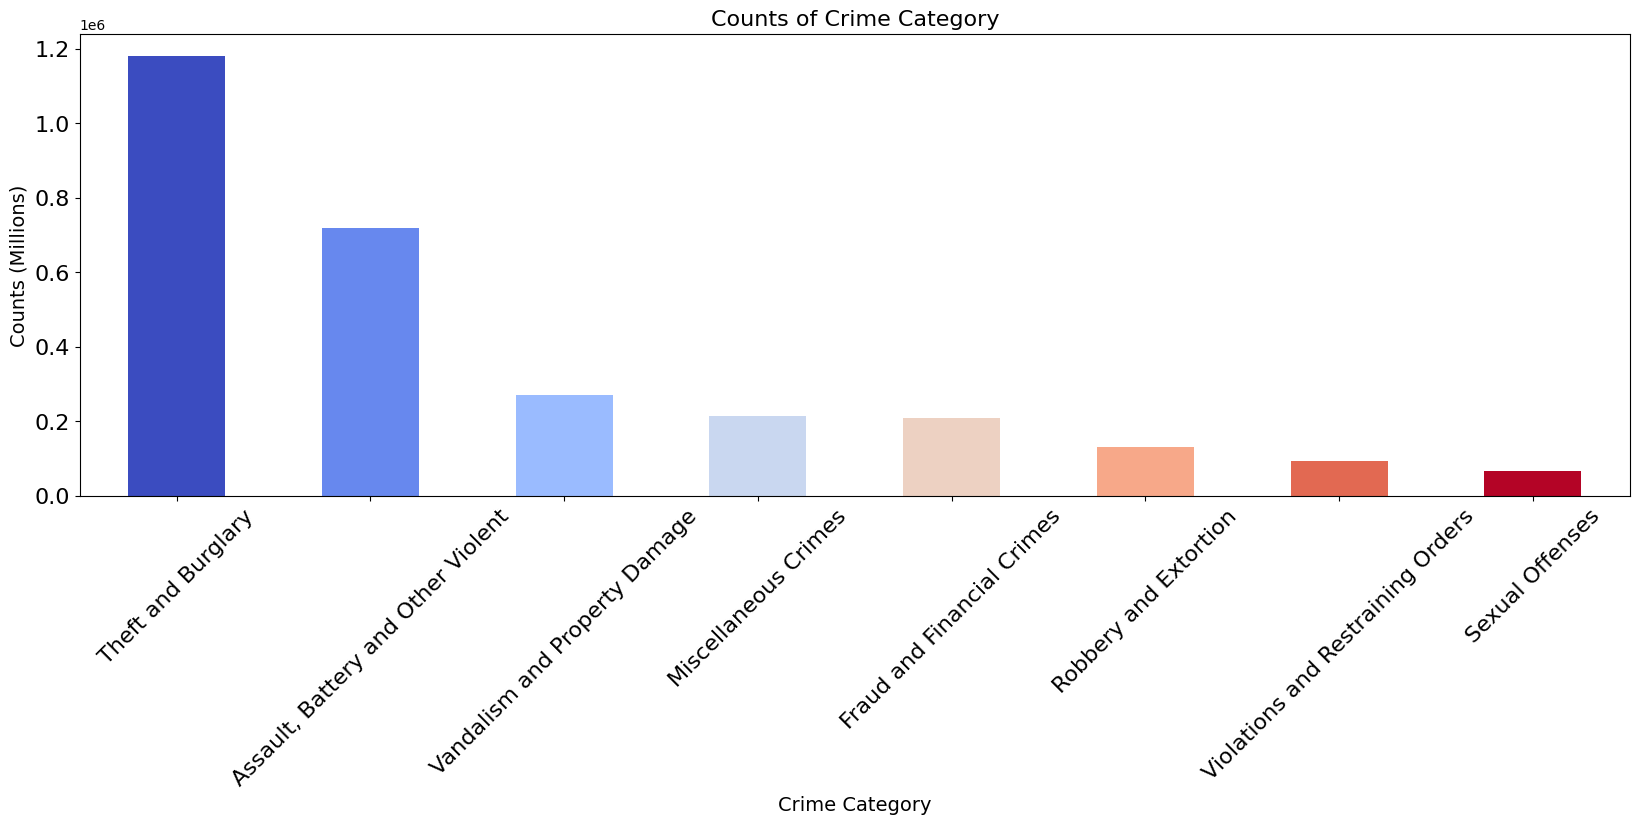

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

category_counts = merged_df['Crime_Category'].value_counts()

# Simulating the operation with the previously used sample data

# Assuming 'crime_categories' and 'counts' represent your actual data
# Re-creating a simplified DataFrame to simulate your scenario
# df_simulated = pd.DataFrame({'Crime_Category': crime_categories * 15})  # Multiplying to simulate repeats
# Generate a list of unique colors for each bar
colors = plt.cm.coolwarm(np.linspace(0, 1, len(category_counts)))

# Plotting the bar chart
plt.figure(figsize=(20, 6))
category_counts.plot(kind='bar', color=colors)
plt.xlabel('Crime Category', fontsize=14)  # Increase font size for the x-axis label
plt.ylabel('Counts (Millions)', fontsize=14)  # Increase font size for the y-axis label
plt.title('Counts of Crime Category', fontsize=16)  # Increase font size for the title
plt.xticks(rotation=45, fontsize=16)  # Increase font size for the x-axis tick labels
plt.yticks(fontsize=16)  # Increase font size for the y-axis tick labels

# Define patches for the legend, assuming this matches your categories
# patches = [
#     mpatches.Patch(color=colors[0], label='< 18'),
#     mpatches.Patch(color=colors[1], label='18 to 65'),
#     mpatches.Patch(color=colors[2], label='65 and up')
# ]

# Add the legend to the plot with an increased font size
# plt.legend(handles=patches, loc='upper right', fontsize=12)

plt.show()

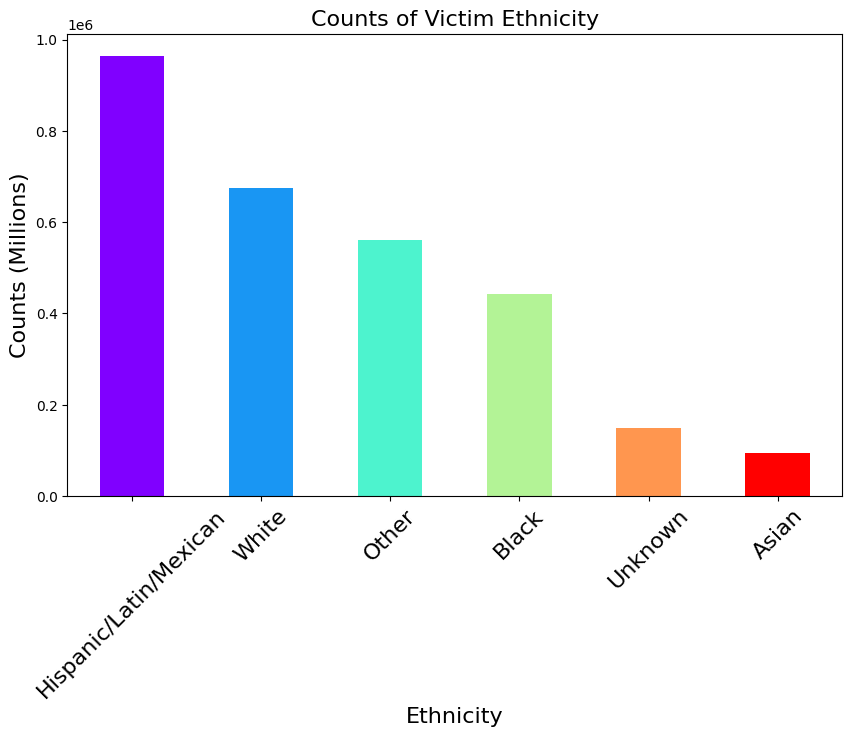

In [62]:
category_counts = merged_df['Region_Ethnic_Origin'].value_counts()
# Generate a list of unique colors for each bar
colors = plt.cm.rainbow(np.linspace(0, 1, len(category_counts)))

# Plotting the bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color=colors)
plt.xlabel('Ethnicity', fontsize = 16)
plt.ylabel('Counts (Millions)', fontsize = 16)
plt.title('Counts of Victim Ethnicity', fontsize = 16)
plt.xticks(rotation=45, fontsize = 16)
plt.show()